# Homework 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
data = pd.read_csv('../../Data/main/MNIST/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Question 1

Dropping all data except for 0, 1, and 5.

In [3]:
filteredData = data[(data['label'] == 0) | 
                    (data['label'] == 1) | 
                    (data['label'] == 5)].reset_index(drop=True)
filteredData.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Question 2

#### Part A

Using PCA to reduce dimensionality of the data to 2 dimensions.

1. Scaling the data

In [4]:
digits = filteredData.drop(columns='label')
labels = filteredData['label']

scaler = StandardScaler()
digits_scaled = scaler.fit_transform(digits)

2. Applying PCA

In [5]:
pca = PCA(n_components=2)
digits_pca = pca.fit_transform(digits_scaled)

Comparison:

In [6]:
print("Before PCA:", digits_scaled.shape)
print("After PCA:", digits_pca.shape)

Before PCA: (12611, 784)
After PCA: (12611, 2)


#### Part B

Plotting the data in 2D for each digit.

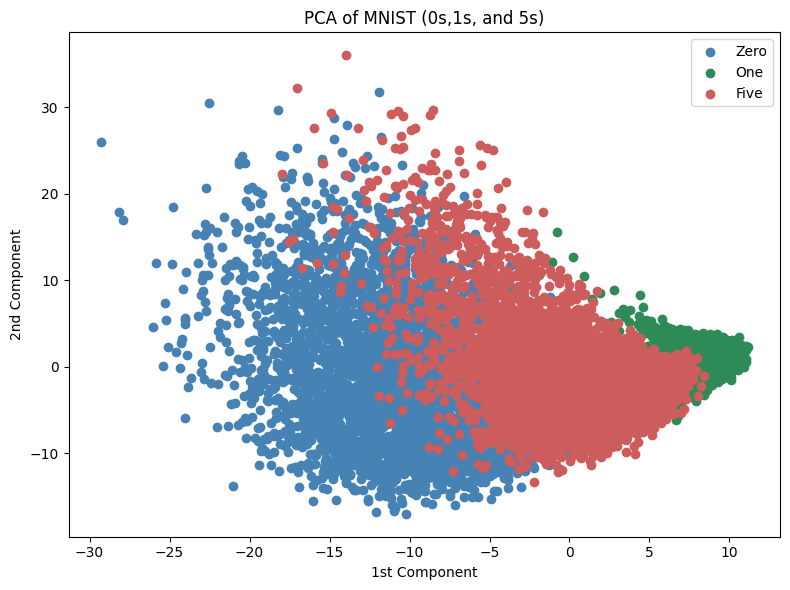

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(digits_pca[labels == 0, 0], digits_pca[labels == 0, 1], label='Zero', color="steelblue")
plt.scatter(digits_pca[labels == 1, 0], digits_pca[labels == 1, 1], label='One', color="seagreen")
plt.scatter(digits_pca[labels == 5, 0], digits_pca[labels == 5, 1], label='Five', color="indianred")
plt.xlabel("1st Component")
plt.ylabel("2nd Component")
plt.title('PCA of MNIST (0s,1s, and 5s)')
plt.legend()
plt.tight_layout()
plt.show()

#### Part C

Now using T-SNE to reduce dimensionality of the data to 2 dimensions and plotting.

1. Applying T-SNE

In [8]:
t_model = TSNE(n_components=2)
digits_embedded = t_model.fit_transform(digits_scaled)

2. Plotting the data in 2D for each digit

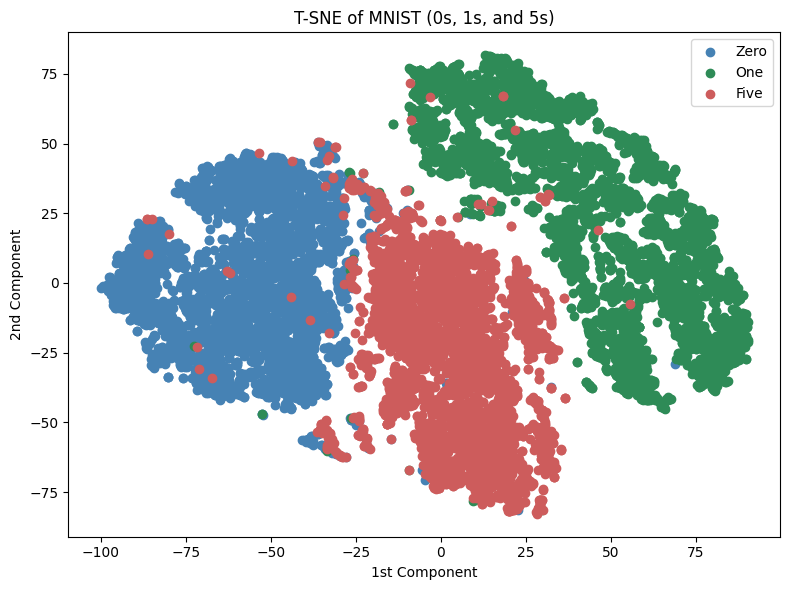

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(digits_embedded[labels == 0, 0], digits_embedded[labels == 0, 1], label='Zero', color="steelblue")
plt.scatter(digits_embedded[labels == 1, 0], digits_embedded[labels == 1, 1], label='One', color="seagreen")
plt.scatter(digits_embedded[labels == 5, 0], digits_embedded[labels == 5, 1], label='Five', color="indianred")
plt.xlabel("1st Component")
plt.ylabel("2nd Component")
plt.title("T-SNE of MNIST (0s, 1s, and 5s)")
plt.legend()
plt.tight_layout()
plt.show()

#### Comparison:

Comparing the results of PCA and T-SNE.

Original shape: (12611, 784)
PCA shape: (12611, 2)
T-SNE shape: (12611, 2)


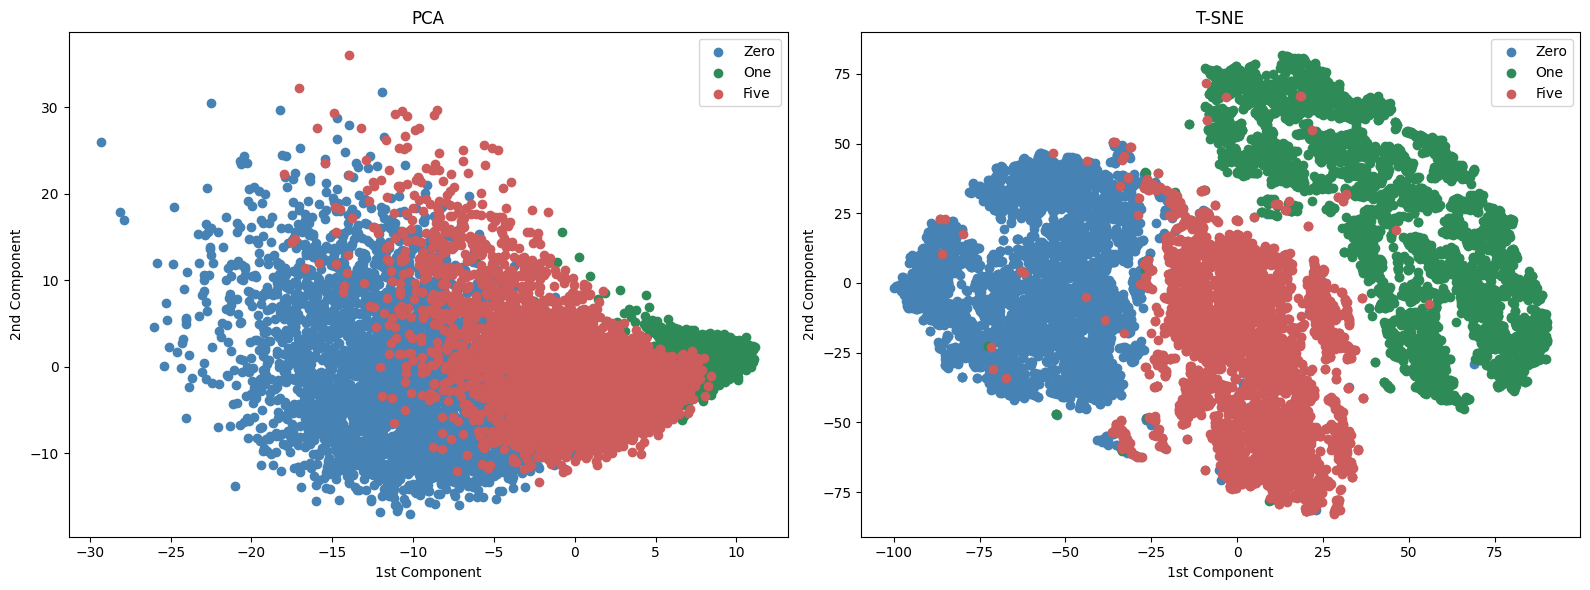

In [10]:
fig, plots = plt.subplots(1, 2, figsize=(16, 6))

print(f'Original shape: {digits_scaled.shape}\nPCA shape: {digits_pca.shape}\nT-SNE shape: {digits_embedded.shape}')

plots[0].scatter(digits_pca[labels == 0, 0], digits_pca[labels == 0, 1], label='Zero', color="steelblue")
plots[0].scatter(digits_pca[labels == 1, 0], digits_pca[labels == 1, 1], label='One', color="seagreen")
plots[0].scatter(digits_pca[labels == 5, 0], digits_pca[labels == 5, 1], label='Five', color="indianred")
plots[0].set_xlabel("1st Component")
plots[0].set_ylabel("2nd Component")
plots[0].set_title("PCA")
plots[0].legend()

plots[1].scatter(digits_embedded[labels == 0, 0], digits_embedded[labels == 0, 1], label='Zero', color="steelblue")
plots[1].scatter(digits_embedded[labels == 1, 0], digits_embedded[labels == 1, 1], label='One', color="seagreen")
plots[1].scatter(digits_embedded[labels == 5, 0], digits_embedded[labels == 5, 1], label='Five', color="indianred")
plots[1].set_xlabel("1st Component")
plots[1].set_ylabel("2nd Component")
plots[1].set_title("T-SNE")
plots[1].legend()

plt.tight_layout()
plt.show()